In [66]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
import cv2
import glob
import os
from sklearn.model_selection import train_test_split
from keras.applications import *
from keras.optimizers import *

In [67]:
Gender = []
Images = []
for i in glob.glob('UTKFace/*.jpg'):
    if os.path.exists(i):
        x = int(i.split('\\')[1].split('_')[0])
        if x >= 0 :
            Gender.append(int(i.split('_')[1]))
            # Images.append('UTKFace/' + i.split('\\')[1])
            Images.append(i)

In [68]:
Gender = np.array(Gender)

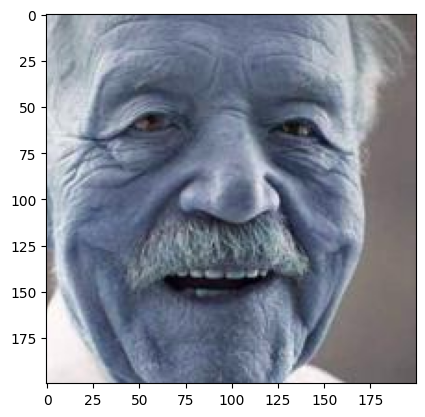

In [69]:
img = cv2.imread(Images[0])
plt.imshow(img)
# img

In [70]:
x_train, x_test, y_train, y_test = train_test_split(Images, Gender, train_size=0.8, shuffle=True, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.85, shuffle=True, random_state=0)

In [71]:
len(x_train), len(x_test), len(x_val)

(16121, 4742, 2845)

In [72]:
data_gen = ImageDataGenerator(rescale=1./255)
df_train = pd.DataFrame({'filename': x_train, 'gender': y_train})
df_train['gender'] = df_train['gender'].astype('str')
df_train['filename'] = df_train['filename'].astype('str')
train = data_gen.flow_from_dataframe(df_train, x_col='filename', y_col='gender', target_size=(120, 120), batch_size=32, class_mode='binary', color_mode='grayscale')

Found 16121 validated image filenames belonging to 2 classes.


In [73]:
df_test = pd.DataFrame({'filename': x_test, 'gender': y_test})
df_test['gender'] = df_test['gender'].astype('str')
df_test['filename'] = df_test['filename'].astype('str')
test = data_gen.flow_from_dataframe(df_test, x_col='filename', y_col='gender', target_size=(120, 120), batch_size=32, class_mode='binary', color_mode='grayscale')

Found 4742 validated image filenames belonging to 2 classes.


In [74]:
df_val = pd.DataFrame({'filename': x_val, 'gender': y_val})
df_val['gender'] = df_val['gender'].astype('str')
df_val['filename'] = df_val['filename'].astype('str')
val = data_gen.flow_from_dataframe(df_val, x_col='filename', y_col='gender', target_size=(120, 120), batch_size=32, class_mode='binary', color_mode='grayscale')

Found 2845 validated image filenames belonging to 2 classes.


In [75]:
len(train)

504

In [76]:
tf.keras.__version__

'2.10.0'

In [77]:
train[0][0].shape

(32, 120, 120, 1)

In [78]:
# def read_img(paths):
#     images = []
#     for x in paths:
#         img = cv2.imread('UTKFace/' + x)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         images.append(np.array(img))
#     return np.array(images)/255
# # read_img(x_train)

In [79]:
# x_train_ = read_img(x_train)
# x_test_ = read_img(x_test)
# x_val_ = read_img(x_val)

In [80]:
# model.fit(train, validation_data=(val),epochs=30)

In [ ]:
model = Sequential()
model.add(Conv2D(512, kernel_size= (3, 3), input_shape = (120, 120, 1), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])
model.summary()
model.fit(train, validation_data=(val), epochs=50,  callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 118, 118, 512)     5120      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 59, 59, 512)      0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 57, 57, 256)       1179904   
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 28, 28, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 26, 26, 128)       295040    
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 13, 13, 128)     

In [166]:
# model  = MobileNet(input_shape=(120, 120, 3), include_top=False)

# for layers in model.layers:
#     layers.trainable=False


# x = Flatten()(model.output)

# # x = Dense(1024,activation='relu')(x)
# # x = Dropout(0.2)(x)
# # x = Dense(512,activation='relu')(x)
# # x = Dropout(0.2)(x)
# x = Dense(256,activation='relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(1, activation='sigmoid')(x)

# model = tf.keras.Model(inputs=model.input,outputs=x)
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
# history = model.fit(train, validation_data=(val), epochs=30) 
#------------------------------------------------------------------------------------------------------->
gender_model = Sequential()

gender_model.add(Conv2D(24, kernel_size=3, activation='relu', input_shape=(120,120,1)))

gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

# gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# gender_model.add(MaxPool2D(pool_size=3, strides=2))

# gender_model.add(Conv2D(1024, kernel_size=3, activation='relu'))
# gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(1024, activation='relu'))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))
print(gender_model.summary())
gender_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history_gender = gender_model.fit(train,
                        validation_data=(val), epochs=50,  callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True))
#------------------------------------------------------------------------------------------------------->

# inputs = Input((120, 120, 1))
# conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
# maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
# conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxp_1)
# maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
# conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(maxp_2)
# maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
# conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxp_3)
# maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
# flatten = Flatten()(maxp_4)
# dense1 = Dense(256, activation = 'relu')(flatten)
# dropout1 = Dropout(0.1)(dense1)
# output1 = Dense(1, activation = 'sigmoid')(dropout1)
# model = Model(inputs=[inputs], outputs=[output1])
# model.compile(loss='mean_squared_error', optimizer= 'adam', metrics=['accuracy'])
# history = model.fit(train, validation_data=(val), epochs=30, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True))


# model = VGG16(input_shape=(120, 120, 3), include_top=False, weights= None)

# for layer in model.layers:
#     layer.trainable = False
    

# # Classification Model
# f1 = GlobalMaxPooling2D()(model.output)
# x = model.output
# f1 = Flatten()(x)
# class1 = Dense(512, activation='relu')(f1)
# class1 = Dropout(0.2)(class1)
# class2 = Dense(1, activation='sigmoid', name='gender')(class1)

# model = Model(inputs=model.input, outputs= class2)
# #model.summary()
# model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy'])
# history = model.fit(train, epochs=30,validation_data=(val), callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))

# model = Sequential()
# model.add(Conv2D(64, (3,3), padding="same", input_shape=(120, 120, 3)))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3,3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization())

# model.add(Conv2D(64, (3,3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3,3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3,3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(1024))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(1, activation='relu', name='gender'))
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
# history = model.fit(train, validation_data=(val), epochs=30)

# age_model = Sequential()
# age_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(128,128,1)))
# #age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# age_model.add(MaxPool2D(pool_size=3, strides=2))

# age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# #age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# age_model.add(MaxPool2D(pool_size=3, strides=2))
              
# age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# #age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# age_model.add(MaxPool2D(pool_size=3, strides=2))

# age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# #age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# age_model.add(MaxPool2D(pool_size=3, strides=2))

# age_model.add(Flatten())
# age_model.add(Dropout(0.2))
# age_model.add(Dense(512, activation='relu'))

# age_model.add(Dense(1, activation='linear', name='age'))
              
# age_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# print(age_model.summary())              
                           
# history_age = age_model.fit(train,
#                         validation_data=(val), epochs=50)


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_123 (Conv2D)         (None, 118, 118, 24)      240       
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 58, 58, 24)       0         
 ng2D)                                                           
                                                                 
 conv2d_124 (Conv2D)         (None, 56, 56, 64)        13888     
                                                                 
 max_pooling2d_101 (MaxPooli  (None, 27, 27, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_125 (Conv2D)         (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_102 (MaxPooli  (None, 12, 12, 128)    

In [ ]:
gender_model.save('model_test_93%.h5')

In [167]:
print(f'\ntrain: {gender_model.evaluate(train)}', f'val: {gender_model.evaluate(val)}', f'test: {gender_model.evaluate(test)}', sep='\n-------------------------------------------------->\n')

14/14 [==============================] - 4s 244ms/step - loss: 0.0806 - accuracy: 0.9049

train: [0.010544363409280777, 0.9893307089805603]
-------------------------------------------------->
val: [0.08203838020563126, 0.9008787274360657]
-------------------------------------------------->
test: [0.08064102381467819, 0.9048924446105957]


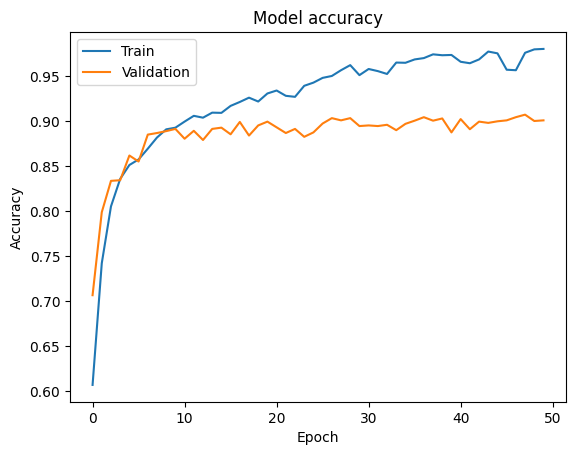

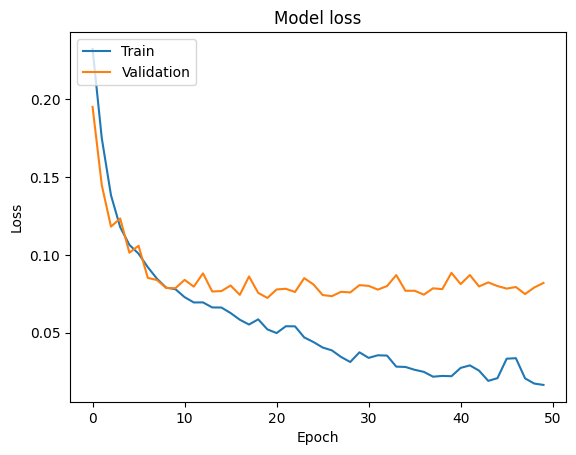

In [168]:
plt.plot(history_gender.history['accuracy'])
plt.plot(history_gender.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over time
plt.plot(history_gender.history['loss'])
plt.plot(history_gender.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 429ms/step
Male


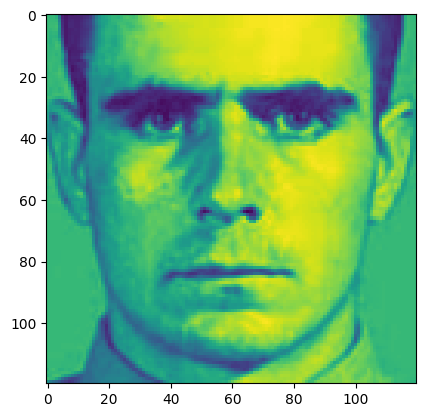

In [169]:
# img1 = cv2.imread(r"F:\ai\Age & Gendder Detection\UTKFace\28_0_0_20170117180613031.jpg.chip.jpg")
# img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# # cv2.resize(img)
img = cv2.imread(r"F:\ai\Age & Gendder Detection\UTKFace\40_0_0_20170120221014042.jpg.chip.jpg")
img = cv2.resize(img, (120, 120))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
img = np.array(img)/255
img = img.reshape(1, 120, 120, 1)

if gender_model.predict(img)[0][0]<=0.5:
    print('Male')
else: 
    print('Female')

In [35]:
model.evaluate(test)

149/149 [==============================] - 6s 41ms/step - loss: 0.3531 - accuracy: 0.8520


[0.3530922830104828, 0.8519611954689026]

In [ ]:
img2 = cv2.imread(r"C:\Users\user\OneDrive - Delta Academy for Science\Desktop\2.jpg")
img3 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3, (200, 200))

img3 = img.reshape(1, 200, 200, 3)
print(model.predict(img3))
np.argmax(model.predict(img3))

In [ ]:
# plt.imshow(img3)

In [ ]:
model = Sequential()
model.add(Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape = (128, 128, 1)))

model.summary()